In [358]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Sampling random functions

In [359]:
x = np.linspace(-5, 5, 40)
print(x.size)

def get_cov(x1, x2, l=1.0):
    C = np.zeros((x1.size, x2.size))
    for i in range(x1.size):
        for j in range(x2.size):
            C[i][j] = np.exp((-1/2.0) * (x1[i] - x2[j])**2 / l**2)
    return C

C = get_cov(x, x)

40


In [360]:
# generate gaussian points from N(0, C)

f = np.random.multivariate_normal(np.zeros(x.size), C, 4)
f.shape

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


(4, 40)

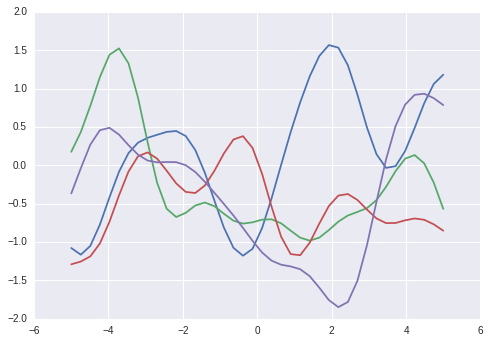

In [361]:
plt.plot(x, f[0])
plt.plot(x, f[1])
plt.plot(x, f[2])
plt.plot(x, f[3])

# Conditioning on data

In [362]:
# Now let's suppose we have some data:
x = np.linspace(-5, 5, 100)
f = 3*np.sin(0.7*x) + x/2.0

tr_x = np.linspace(-5, 5, 6)
tr_f = 3*np.sin(0.7*tr_x) + tr_x/2.0
te_x = np.array([-4.0, 1.0, 0.0, 2.8])

C_tr_tr = get_cov(tr_x, tr_x)
C_te_te = get_cov(te_x, te_x)
C_te_tr = get_cov(te_x, tr_x)
C_tr_te = get_cov(tr_x, te_x)

In [363]:
C_tr_tr_inv = np.linalg.inv(C_tr_tr)
u = np.dot(C_te_tr, C_tr_tr_inv)
u = np.dot(u, tr_f)
u

array([ -2.82099034e+00,   2.43265306e+00,  -6.93889390e-18,
         4.11238584e+00])

In [364]:
S = C_te_te - np.dot( np.dot(C_te_tr, C_tr_tr_inv), C_tr_te)

In [365]:
te_f = np.random.multivariate_normal(u, S)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


In [366]:
te_f

array([-1.96957266,  2.43265306,  0.023106  ,  3.82886332])

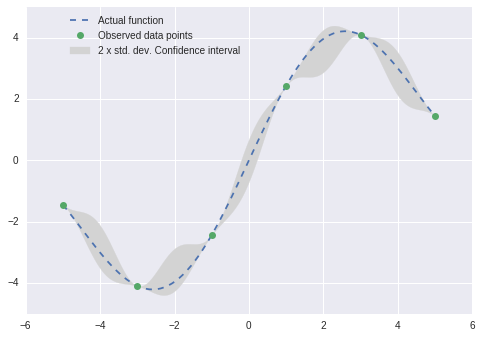

In [367]:
dev_up = []
dev_down = []
means = []
xs = np.linspace(-5, 5, 700)
for i in xs:
    xx = np.array([i])
    
    C_te_te = get_cov(xx, xx)
    C_te_tr = get_cov(xx, tr_x)
    C_tr_te = get_cov(tr_x, xx)

    u = np.dot(C_te_tr, C_tr_tr_inv)
    u = np.dot(u, tr_f)
    means.append(u[0])
    S = C_te_te - np.dot( np.dot(C_te_tr, C_tr_tr_inv), C_tr_te)
    dev_up.append(u[0] + 2*S[0][0])
    dev_down.append(u[0] - 2*S[0][0])
    
dev_up
plt.fill_between(xs, dev_down, dev_up, color='lightgrey', label='2 x std. dev. Confidence interval')
plt.plot(x, f, '--', label='Actual function')
plt.plot(tr_x, tr_f, 'o', label='Observed data points')
#plt.plot(xs, means, '.', color='red')
plt.legend(bbox_to_anchor=(0.5, 1))